In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.5-cp313-cp313-win_amd64.whl.metadata (109 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using

In [2]:
%pip install notebook

  Using cached notebook-7.4.4-py3-none-any.whl.metadata (10 kB)
  Using cached jupyter_server-2.16.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached jupyterlab-4.4.4-py3-none-any.whl.metadata (16 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached jupyter_events-0.12.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached jupyter_server_terminals-0.5.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached prometheus_client-0.22.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached pywinpty-2.0.15-c

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Cargar datos
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

In [5]:
red["type"] = "red"
white["type"] = "white"
df = pd.concat([red, white], ignore_index=True)

In [6]:
# Exploración inicial
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Ver si hay valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

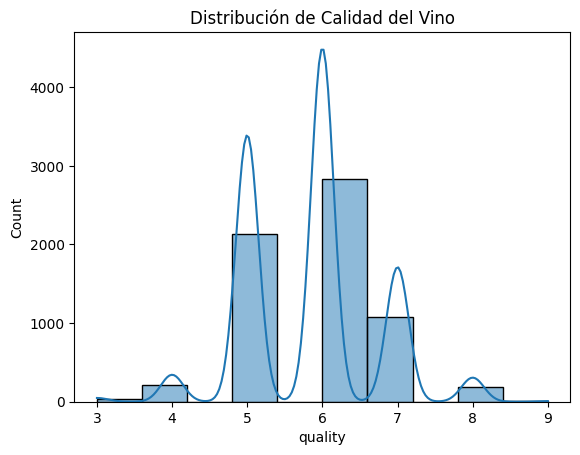

In [7]:
# Visualización
sns.histplot(df['quality'], bins=10, kde=True)
plt.title('Distribución de Calidad del Vino')
plt.show()

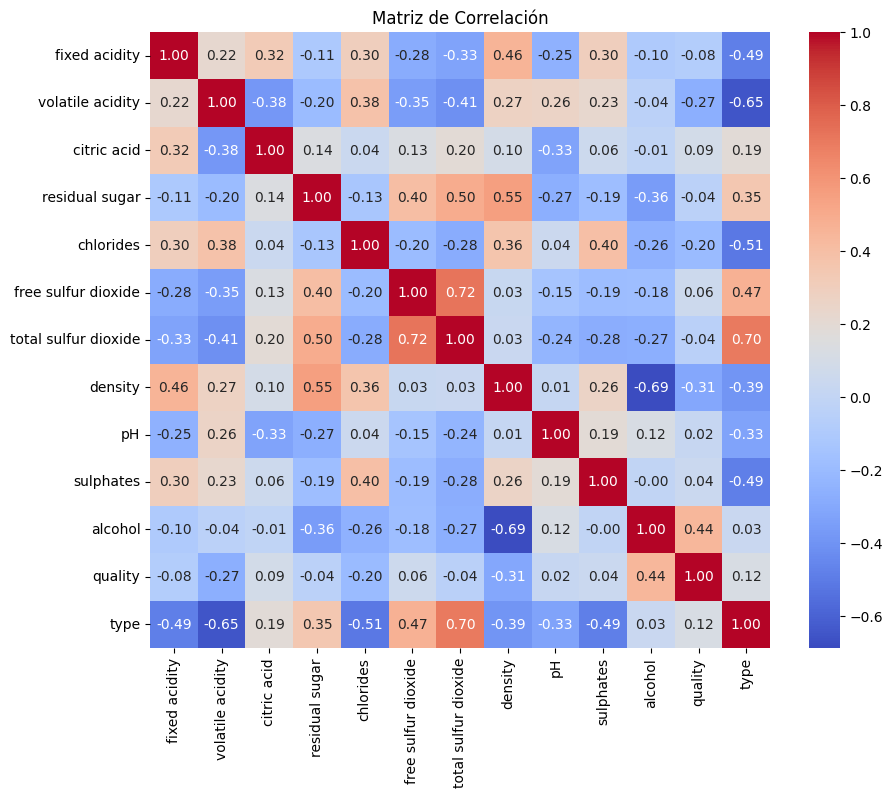

In [10]:
# Convertir 'type' a valor numérico
df_corr = df.copy()
df_corr['type'] = df_corr['type'].map({'red': 0, 'white': 1})

# Graficar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Matriz de Correlación')
plt.show()

In [11]:
# Selección de variables
X = df.drop(columns=['quality', 'type'])  # Variables independientes
y = df['quality']                         # Variable dependiente

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar Modelo de Regresión Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predicción
y_pred_lr = lr.predict(X_test)

# Métricas
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal:")
print(f"Error cuadrático medio (MSE): {mse_lr:.2f}")
print(f"Coeficiente de determinación (R²): {r2_lr:.2f}")

Regresión Lineal:
Error cuadrático medio (MSE): 0.55
Coeficiente de determinación (R²): 0.26


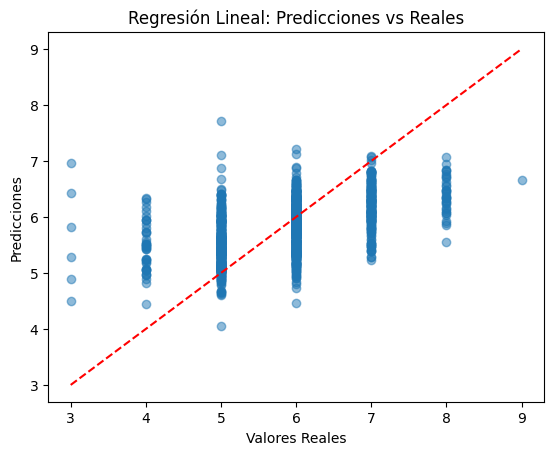

In [13]:
# Gráfico de predicciones
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Reales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.show()

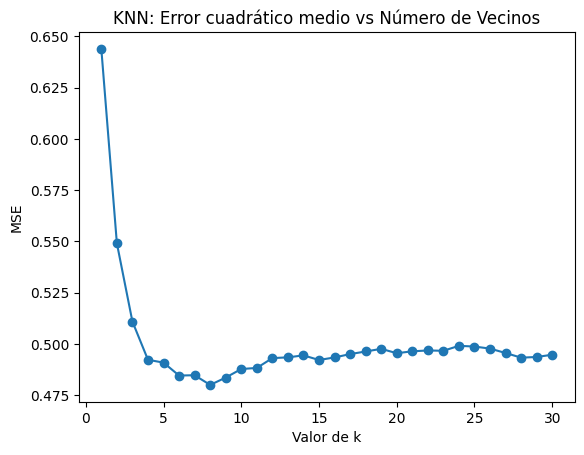

Mejor valor de k: 8


In [14]:
# Buscar el mejor KNN
error_k = []
r2_k = []
k_range = range(1, 31)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_k.append(mean_squared_error(y_test, pred))
    r2_k.append(r2_score(y_test, pred))

# Gráfico de errores vs k
plt.plot(k_range, error_k, marker='o')
plt.xlabel('Valor de k')
plt.ylabel('MSE')
plt.title('KNN: Error cuadrático medio vs Número de Vecinos')
plt.show()

# Mejor k
best_k = k_range[np.argmin(error_k)]
print(f"Mejor valor de k: {best_k}")

In [15]:
# Modelo final KNN
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)

# Métricas
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("KNN:")
print(f"Error cuadrático medio (MSE): {mse_knn:.2f}")
print(f"Coeficiente de determinación (R²): {r2_knn:.2f}")

KNN:
Error cuadrático medio (MSE): 0.48
Coeficiente de determinación (R²): 0.35


Comparación de Modelos:
Regresión Lineal - MSE: 0.55, R²: 0.26
KNN (k=8)     - MSE: 0.48, R²: 0.35


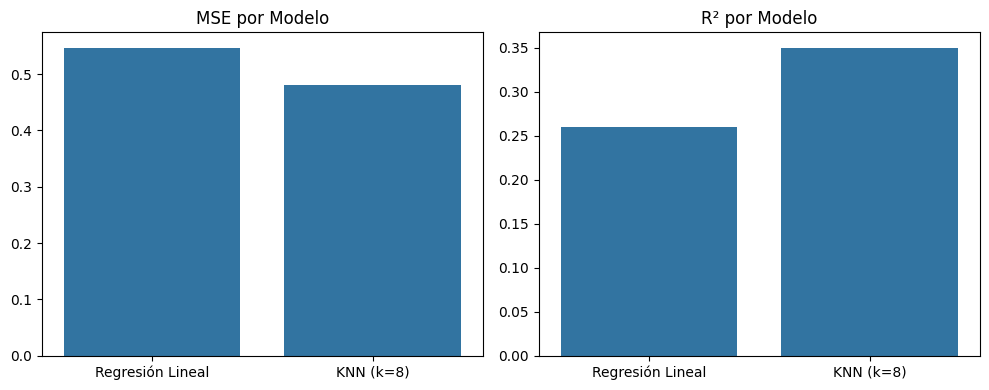

In [16]:
# Comparación de métricas
print("Comparación de Modelos:")
print(f"Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"KNN (k={best_k})     - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}")

# Gráfica comparativa
models = ['Regresión Lineal', f'KNN (k={best_k})']
mse_values = [mse_lr, mse_knn]
r2_values = [r2_lr, r2_knn]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=models, y=mse_values)
plt.title("MSE por Modelo")

plt.subplot(1,2,2)
sns.barplot(x=models, y=r2_values)
plt.title("R² por Modelo")

plt.tight_layout()
plt.show()
